In [47]:
import os
os.chdir(r"/Users/Greer/Desktop/Lending Club - JL")

import numpy as np
import pandas as pd
import seaborn as sns

# Import LC_UniqLoansEnded_All (All Unique Loan IDs, final period, from LC)

In [2]:
import csv

## Check the attributes list
with open("LC_database_all_clean.csv", newline='') as f:
  reader = csv.reader(f)
  row1 = next(reader)
    
print(row1)

['', 'loan_amnt', 'int_rate', 'term', 'installment', 'funded_amnt', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'total_acc', 'revol_bal', 'revol_util', 'inq_last_6mths', 'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'mths_since_last_record', 'mths_since_last_major_derog', 'collections_12_mths_ex_med', 'state', 'HomeOwnCat', 'GradeCat', 'Purpose', 'EarliestCreditMonths', 'Default']


In [144]:
df = pd.read_csv("LC_database_all_clean.csv", low_memory=False)
df.head()

,Unnamed: 0,loan_amnt,int_rate,term,installment,funded_amnt,emp_length,annual_inc,dti,open_acc,...,pub_rec,mths_since_last_record,mths_since_last_major_derog,collections_12_mths_ex_med,state,HomeOwnCat,GradeCat,Purpose,EarliestCreditMonths,Default
0,0,5000.0,10.65,36.0,162.87,5000.0,10,24000.0,27.65,3.0,...,0.0,0.0,0.0,0.0,3,5,1,1,384.0,0
1,1,2500.0,15.27,60.0,59.83,2500.0,1,30000.0,1.00,3.0,...,0.0,0.0,0.0,0.0,10,5,2,0,213.0,1
2,2,2400.0,15.96,36.0,84.33,2400.0,10,12252.0,8.72,2.0,...,0.0,0.0,0.0,0.0,14,5,2,11,182.0,0
3,3,10000.0,13.49,36.0,339.31,10000.0,10,49200.0,20.00,10.0,...,0.0,0.0,0.0,0.0,4,5,2,9,251.0,0
4,4,3000.0,12.69,60.0,67.79,3000.0,1,80000.0,17.94,15.0,...,0.0,0.0,0.0,0.0,37,5,1,9,252.0,0


In [145]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [50]:
len(df)

1218316

In [146]:
df.reset_index
df.shape

(1218316, 27)

## CHECK FEATURES

In [17]:
df.iloc[:4,:13]

,loan_amnt,int_rate,term,installment,funded_amnt,emp_length,annual_inc,dti,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths
0,5000.0,10.65,36.0,162.87,5000.0,10,24000.0,27.65,3.0,9.0,13648.0,83.7,1.0
1,2500.0,15.27,60.0,59.83,2500.0,1,30000.0,1.00,3.0,4.0,1687.0,9.4,5.0
2,2400.0,15.96,36.0,84.33,2400.0,10,12252.0,8.72,2.0,10.0,2956.0,98.5,2.0
3,10000.0,13.49,36.0,339.31,10000.0,10,49200.0,20.00,10.0,37.0,5598.0,21.0,1.0


In [18]:
df.iloc[:4,13:20]

,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,pub_rec,mths_since_last_record,mths_since_last_major_derog
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,35.0,0.0,0.0,0.0


In [13]:
df.iloc[:4,20:30]

,collections_12_mths_ex_med,state,HomeOwnCat,GradeCat,Purpose,EarliestCreditMonths,Default
0,0.0,3,5,1,1,384.0,0
1,0.0,10,5,2,0,213.0,1
2,0.0,14,5,2,11,182.0,0
3,0.0,4,5,2,9,251.0,0


## Ensure all data is in float form

In [8]:
df.dtypes

loan_amnt                      float64
int_rate                       float64
term                           float64
installment                    float64
funded_amnt                    float64
emp_length                       int64
annual_inc                     float64
dti                            float64
open_acc                       float64
total_acc                      float64
revol_bal                      float64
revol_util                     float64
inq_last_6mths                 float64
acc_now_delinq                 float64
delinq_amnt                    float64
delinq_2yrs                    float64
mths_since_last_delinq         float64
pub_rec                        float64
mths_since_last_record         float64
mths_since_last_major_derog    float64
collections_12_mths_ex_med     float64
state                            int64
HomeOwnCat                       int64
GradeCat                         int64
Purpose                          int64
EarliestCreditMonths     

# DESCRIPTIVE STATS AND GRAPHS

In [52]:
## Examine distribution of delinquency
df.Default.value_counts()
# 9.072x more non-defaults

0    1097355
1     120961
Name: Default, dtype: int64

In [10]:
###### SOME GRAPHICAL ANALYSIS ######

### Highly Correlated Data
## examine our dataframe's correlation matrix and drop highly correlated/redundant data to address multicollinearity
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

installment             loan_amnt      0.945736
funded_amnt             loan_amnt      0.999478
                        installment    0.946467
total_acc               open_acc       0.701888
mths_since_last_record  pub_rec        0.655152
GradeCat                int_rate       0.955893
dtype: float64

In [53]:
###### DROP HIGHLY MULTICOLLINEAR (rho > |.65|) VARIABLES ######
df.drop(['GradeCat','mths_since_last_record','total_acc','funded_amnt','installment'], axis=1, inplace=True)

# RFC deals well with multicollinearity, so leave in some collinear vars for now

In [147]:
df.shape

(1218316, 27)

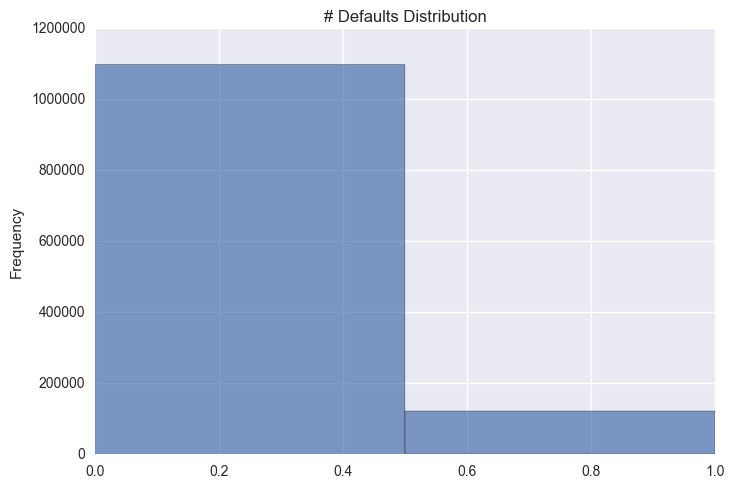

In [24]:
###### DISTRIBUTION OF DEPENDENT VARIABLE: Default (categorical) ######
import matplotlib.pyplot as plt

y = df.Default.values
np.unique(y), pd.Series(y).plot(kind='hist',alpha=.7, bins=2, title='# Defaults Distribution')
plt.show()

In [ ]:
feats = df.columns.values
feats

# Training vs. Test Sets for RFC

## New Pre-Classification (using Random Under-Sampling of Majority Class)

In [249]:
from sklearn.datasets import make_classification
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# X = Explanatory
X = df[['loan_amnt', 'int_rate', 'term', 'emp_length', 'annual_inc', 'dti',
       'open_acc', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs',
       'mths_since_last_delinq', 'pub_rec', 'mths_since_last_major_derog',
       'collections_12_mths_ex_med', 'state', 'HomeOwnCat', 'Purpose',
       'EarliestCreditMonths']]
# X = df[feats]
# y = Target
y = df['Default']

# X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
#                            n_features=21, n_clusters_per_class=2, n_samples=10000, random_state=42)
X, y = make_classification(n_classes=2, class_sep=1, weights=[0.9, 0.1], n_informative=21, n_redundant=0, flip_y=0,
                           n_features=21, n_clusters_per_class=2, n_samples=len(df), random_state=42)
print('Original dataset shape {}'.format(Counter(y)))

# Original dataset shape Counter({1: 900, 0: 100})

Original dataset shape Counter({0: 1096485, 1: 121831})


In [254]:
X_train.shape

(974652, 21)

In [253]:
#######################################################################################
# X_set = X[['loan_amnt', 'int_rate', 'term', 'emp_length', 'annual_inc', 'dti',
#        'open_acc', 'revol_bal', 'revol_util', 'inq_last_6mths',
#        'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs',
#        'mths_since_last_delinq', 'pub_rec', 'mths_since_last_major_derog',
#        'collections_12_mths_ex_med', 'state', 'HomeOwnCat', 'Purpose', 'EarliestCreditMonths']]
# y_set = y['Default']
cutoff = int(.8*len(df))
X_train = X[:cutoff,:]
X_test = X[cutoff:,:]
y_train = y[:cutoff]
y_test = y[cutoff:]
########################################################################################

# Undersample the Training Set
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

# Resampled dataset shape Counter({0: 100, 1: 100})

Resampled dataset shape Counter({0: 97237, 1: 97237})


## Original Baseline Pre-Classification (using train_test_split)

In [ ]:
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification


# # X = Explanatory
# X = df[['loan_amnt', 'int_rate', 'term', 'emp_length', 'annual_inc', 'dti',
#        'open_acc', 'revol_bal', 'revol_util', 'inq_last_6mths',
#        'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs',
#        'mths_since_last_delinq', 'pub_rec', 'mths_since_last_major_derog',
#        'collections_12_mths_ex_med', 'state', 'HomeOwnCat', 'Purpose',
#        'EarliestCreditMonths']]
# # X = df[feats]
# # y = Target
# y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The classes are either '1' or '0' where the ratio of class '0':'1' is 9.07:1
weight0 = 1
weight1 = 9
cl_weight = {0:weight0, 1:weight1}
# Sample weights you want the model to train on: default is 1, equal weights

# Build a classification task using 10 informative features
# X, y = make_classification(n_samples=5000,
#                            n_features=21,
#                            n_informative=21,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=2,
#                            random_state=0,
#                            shuffle=False)

####                          

# RANDOM FOREST - Categorical DV

In [267]:
from sklearn.ensemble import RandomForestClassifier  # takes in categorical DV
from sklearn.ensemble import RandomForestRegressor   # continuous DV

# rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=20, oob_score = True, class_weight = cl_weight) 
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=500, oob_score = True) 

rfc.fit(X_res, y_res)
results_train = rfc.predict(X_res)
results = rfc.predict(X_test)
prob = rfc.predict_proba(X_test)

In [268]:
###### Quick check of results
results[0:20]
prob[0:20]
# Note: for prob, the second column is for default

array([[ 1.   ,  0.   ],
       [ 0.458,  0.542],
       [ 0.97 ,  0.03 ],
       [ 0.996,  0.004],
       [ 0.77 ,  0.23 ],
       [ 0.99 ,  0.01 ],
       [ 0.93 ,  0.07 ],
       [ 0.854,  0.146],
       [ 0.008,  0.992],
       [ 0.216,  0.784],
       [ 0.828,  0.172],
       [ 0.1  ,  0.9  ],
       [ 0.646,  0.354],
       [ 0.942,  0.058],
       [ 1.   ,  0.   ],
       [ 0.996,  0.004],
       [ 0.972,  0.028],
       [ 0.912,  0.088],
       [ 0.998,  0.002],
       [ 0.952,  0.048]])

In [275]:
######### Pickle the RF output results and predictions #########
import pickle

with open('RandomForest_LCdb_undersample.pkl', 'wb') as f:
    pickle.dump(rfc, f)

# Start from here

## open saved RF model with pickle

In [28]:
# from sklearn.cross_validation import train_test_split
# import pickle
# import _pickle as cPickle

# # X = Explanatory
# X = df[['loan_amnt', 'int_rate', 'term', 'emp_length', 'annual_inc', 'dti',
#        'open_acc', 'revol_bal', 'revol_util', 'inq_last_6mths',
#        'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs',
#        'mths_since_last_delinq', 'pub_rec', 'mths_since_last_major_derog',
#        'collections_12_mths_ex_med', 'state', 'HomeOwnCat', 'Purpose',
#        'EarliestCreditMonths']]

# # y = Target
# y = df['Default']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# with open('RandomForest_LCdb_undersample.pkl', 'rb') as f:
#     rf = pickle.load(f)

# results_train = rf.predict(X_train)
# results = rf.predict(X_test)
# prob = rf.predict_proba(X_test)

In [269]:
df_compare = pd.DataFrame(y_test,index=range(len(y_test)))

In [270]:
# df_compare['prob'] = prob
df_compare['predict'] = results
df_compare

,0,predict
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


In [271]:
### Recall, precision --> F1 Score
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, results)
precision

array([ 0.10093407,  0.74100295,  1.        ])

In [272]:
from sklearn import metrics

# testing score
score = metrics.f1_score(y_test, results)
#score = metrics.f1_score(y_test, results, pos_label=list(set(y_test)))

# training score
# score_train = metrics.f1_score(y_train, results_train)
score

0.84029648409302982

In [273]:
### Accuracy Score
pscore = metrics.accuracy_score(y_test, results)
# pscore_train = metrics.accuracy_score(y_train, results_train)
pscore

# “accuracy classification score”. What it does is calculate how accurate the classification is.

0.96277250640225887

In [274]:
from sklearn.metrics import classification_report

print(classification_report(y_test,results))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98    219070
          1       0.74      0.97      0.84     24594

avg / total       0.97      0.96      0.96    243664



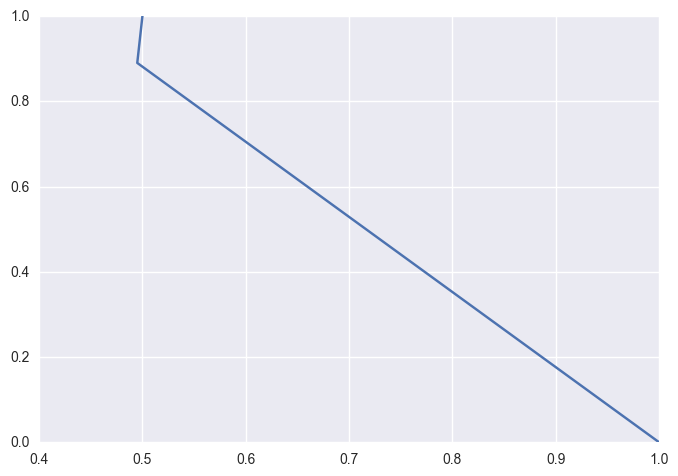

In [80]:
plt.plot(precision,recall)
plt.show()

## Plot the ROC curve

In [263]:
### Obtain ROC and AUC scores
roc = metrics.roc_curve(y_test, results, pos_label=None, sample_weight=None, drop_intermediate=True)
auc = metrics.roc_auc_score(y_test, results, average='macro', sample_weight=None)
auc

0.97746703177547412

ROC AUC: 1.00


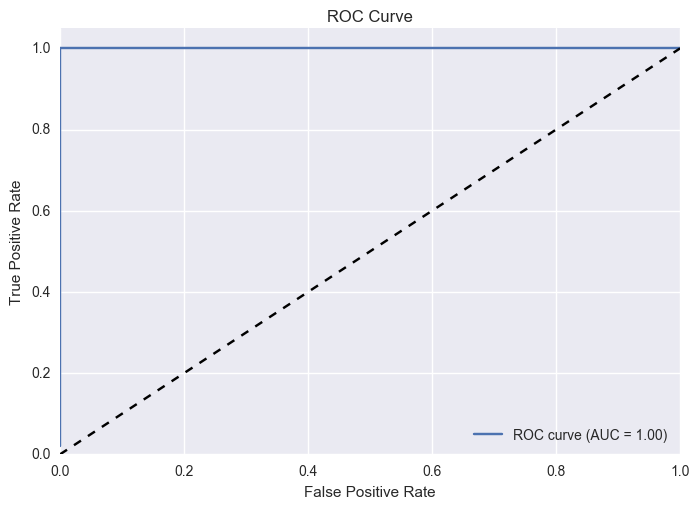

In [158]:
##### Plot the ROC and show AUC #####
# Calculate the AUC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

roc_auc = metrics.auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [264]:
##### Mean Squared Error of Test
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, results)
print("MSE: %.4f" % mse)

MSE: 0.0270


In [233]:
##### Mean Squared Error of Training
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, results_train)
print("MSE: %.4f" % mse)

ValueError: Found arrays with inconsistent numbers of samples: [1666 8000]

## Feature Analysis

In [36]:
print(rfc.feature_importances_)

[ 0.07340918  0.15713894  0.00933418  0.0390665   0.08129616  0.09058198
  0.05850628  0.08909845  0.08913712  0.02438137  0.00058939  0.0006488
  0.01386019  0.04469436  0.01177611  0.02748462  0.00209791  0.06210419
  0.01244198  0.02515734  0.08719494]


In [15]:
###### Important Features Ranking ######

# X_titles = ['loan_amnt', 'int_rate', 'term', 'emp_length', 'annual_inc', 'dti',
#        'open_acc', 'revol_bal', 'revol_util', 'inq_last_6mths',
#        'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs',
#        'mths_since_last_delinq', 'pub_rec', 'mths_since_last_major_derog',
#        'collections_12_mths_ex_med', 'state', 'HomeOwnCat', 'Purpose',
#        'EarliestCreditMonths']

# Prettier translated variable titles
X_titles = ['Loan Amount', 'Interest Rate', 'Term', 'Employment Length', 'Annual Income', 'Debt-to-Income',
            'Open Credit Lines', 'Revolving Credit Balance', 'Revolving Line Utilization', 'Inquiries - past 6M',
            'Accounts Now Delinquent', 'Delinquency Amount', 'Delinquencies - past 2Y', 
            'Months since last delinquency', 'Public Records', 'Months since last major derogatory', 
            'Collections 12M excl. med','State', 'Home Ownership', 'Purpose', 'Months Since Earliest Credit']

### Variables seen by investor: map to my vars ###
#  'DUE_AMT' = 'AMT'???
#  'MOB' = 'SUBMIT_DATE'??
#  'InterestRate' = 'INTERESTRATE'
#  'MONTHLYCONTRACTAMT' = 'MON_PMT'
#  'dti'='DTI'
#  'MonthlyIncome' = 'MON_INCOME'
#  'OpenCREDITLines' = 'OPENCRLINES'
#  'TotalCREDITLines' = 'TOTCRLINES'
#  'RevolvingCREDITBalance' = 'RevolvingCREDITBalance'
#  'RevolvingLineUtilization' = 'RevolvingLineUtilization'
#  'Inquiries6M' = 'Inquiries6M'
#  'DQ2yrs' = 'DQ2yrs'
#  'PublicRec' = 'PublicRec'
#  'EmploymentLength' = 'EMP_LENGTH'
#  'APPL_FICO_BAND' = 'APPL_FICO_BAND'
#  'StateCat' = 'STATE'
#  'HomeOwnCat' = 'HOMEOWNERSHIP'
#  'GradeCat' = 'GRADE'
#  'EarliestCreditMonths' = 'EARLIESTCREDIT'
#  'term' = 'LOANLENGTH'

feature_names = np.array(X_titles)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_
                            for tree in rfc.estimators_], axis=0)
indices = np.argsort(X_titles)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. Term (0.009513)
2. State (0.062098)
3. Revolving Line Utilization (0.088838)
4. Revolving Credit Balance (0.088942)
5. Purpose (0.024977)
6. Public Records (0.011889)
7. Open Credit Lines (0.058926)
8. Months since last major derogatory (0.027411)
9. Months since last delinquency (0.044553)
10. Months Since Earliest Credit (0.086995)
11. Loan Amount (0.073097)
12. Interest Rate (0.157408)
13. Inquiries - past 6M (0.024234)
14. Home Ownership (0.012933)
15. Employment Length (0.038876)
16. Delinquency Amount (0.000634)
17. Delinquencies - past 2Y (0.013856)
18. Debt-to-Income (0.090843)
19. Collections 12M excl. med (0.002129)
20. Annual Income (0.081252)
21. Accounts Now Delinquent (0.000596)


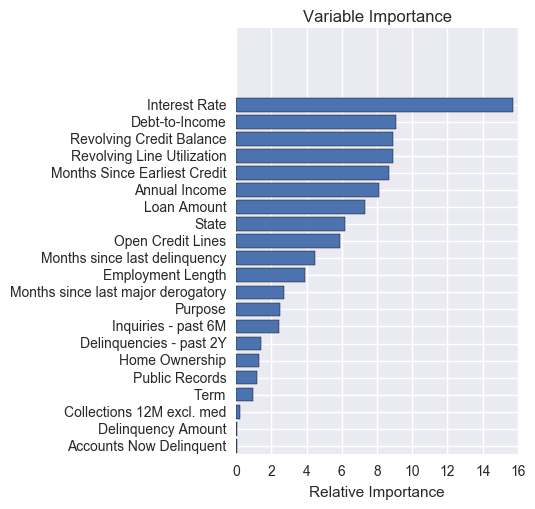

In [16]:
###### Plot the feature importances of the forest ######
from matplotlib import pyplot as plt

feature_importance = rfc.feature_importances_
# make importances relative to max importance
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance = 100.0 * feature_importance

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## EXTRA STUFF, NOT YET HAD TIME FOR

In [19]:
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        results[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], results[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    results.ravel())
average_precision["micro"] = average_precision_score(y_test, results,
                                                     average="micro")


# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

ValueError: Can only tuple-index with a MultiIndex

In [37]:
# savetxt('RF_fit.csv', rfc.predict(X_test), delimiter=',', fmt='%f')
    
# param_grid = { 
#     'n_estimators': [200, 700],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# y_pred = CV_rfc.fit(X, y).predict(X_test)
# print(CV_rfc.best_params_)
# print(y_pred)

In [ ]:
##### Gradient Boosted Regression Trees
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

X, y = shuffle(df.values, y, random_state=30)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.75)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

##### Estimate Best Parameters
from sklearn.grid_search import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              'max_features': [1.0, 0.3, 0.1]
              }
# param_grid = {'learning_rate': [0.1],
#               'max_depth': [4],
#               'min_samples_leaf': [3],
#               'max_features': [1.0],
#               }

est = GridSearchCV(ensemble.GradientBoostingRegressor(n_estimators=100),
                   param_grid, n_jobs=4, refit=True)

est.fit(X_train, y_train)

best_params = est.best_params_

##### Run the Gradient Boosting 
est = ensemble.GradientBoostingRegressor(n_estimators=2000).fit(X_train, y_train)

##### Get 
est.score(X_test,y_test)

In [ ]:
##### Look at Partial Dependence Plots to understand the functional relations between predictors and an outcome
## capture marginal effect of a given variable or variables on the target function, in this case defaults

from sklearn.ensemble.partial_dependence import plot_partial_dependence

comp_features = [('annual_inc','dti'),'loan_amnt','Last_FICO_BAND','annual_inc', 'inq_last_6mths', 'revol_util', 'dti']

fig, axs = plot_partial_dependence(est, X_train, comp_features,
                                   feature_names=list(df.columns),
                                   figsize=(14, 14), n_jobs=4)

In [39]:
##### Additional plots to look at relationships

## TAKES A REAAAALLLLY LONG TIME, BUT LOOKS COOL.. HEAT MAP TYPE PLOT

# sns.jointplot(y,df.Last_FICO_BAND.values,annot_kws=dict(stat="r"),
#               kind="kde", color="#4CB391").set_axis_labels("DQ2yrs", "Last_FICO_BAND")
# sns.plt.show()

KeyboardInterrupt: 